# Assignment 6:
## Part 1:
Read the data into a  dataframe:

In [40]:
import pandas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

data = pandas.read_csv("data/expanded")
dummies = pandas.get_dummies(data)
X, y = pandas.get_dummies(data.drop("edibility", axis='columns')), pandas.get_dummies(data["edibility"])
print(X.shape)
print(y.shape)

skb = SelectKBest(chi2, k=3)
skb.fit(X, y)
X_new = skb.transform(X)

print(X_new.shape)

# Fetch the selected feature indices and print the corresponding feature names
selected = [dummies.columns[i] for i in skb.get_support(indices=True)]
print(selected)



(8416, 117)
(8416, 2)
(8416, 3)
['odor_CREOSOTE', 'odor_FOUL', 'stalk-surface-above-ring_FIBROUS']


By running this code we find that the edibility feature is the most selective one
(as it only has 2 classifications to begin with)

## Part 2:
constructing reduced space with max variance:

In [41]:
from sklearn import decomposition

print("Original space:",X.shape)
pca = decomposition.PCA(n_components=3)
pca.fit(X)
Xpca = pca.transform(X)

print("PCA space:",Xpca.shape)
features = [np.abs(pca.components_[i]).argmax() for i in range(Xpca.shape[1])] 
feature_names = [X.columns[features[i]] for i in range(Xpca.shape[1])]
print("Features accounting for max variance")
print(feature_names)


Original space: (8416, 117)
PCA space: (8416, 3)
Features accounting for max variance
['ring-type_PENDANT', 'stalk-root_BULBOUS', 'habitat_GRASSES']


## Part 3:
From the plot below we can see that there is plenty of ovelap between the selected features and the ones we find during PCA. Both in the set of features accounting for max variance, and the rest.







In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
# ax = Axes3D(fig, rect=[0.0, 0.0, 1, 1], elev=48, azim=134)
print("Features found during selection.")
print("Blue dots are part of selected, green of max-variance and red of PCA not accounting for variance ")

plt.cla()
ax = Axes3D(fig, elev=20, azim=127)

y_colors = ["red" for p in data[feature_names[0].split("_")[0]]]

for name in feature_names:
    for index in range(len(dummies[name])):
        if dummies[name][index] == 1:
            y_colors[index] = "green"

for name in selected:
    for index in range(len(dummies[name])):
        if dummies[name][index] == 1:
            y_colors[index] = "blue"
    
    
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c=y_colors, label=feature_names, cmap=plt.cm.nipy_spectral,
           edgecolor='k')
plt.draw()
ax.set_title("PCA")
plt.show()

Features found during selection.
Blue dots are part of selected, green of max-variance and red of PCA not accounting for variance 


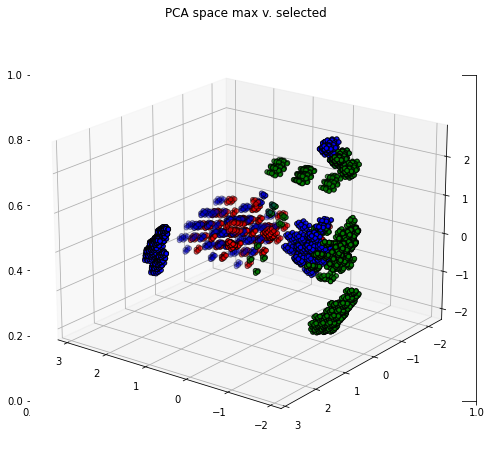